# Model de diffusion dans un canal étroit 

Code origine : $\mathrm{\color{red}{Cumulant4\_fonction.py}}$ et  $\mathrm{\color{red}{DoubleRigidWallOverdampedBrownExp\_Cython.pyx}}$

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 14/01/2022

## Objectif : faire $n$ réalisations pour agmenter la stat de $C_4(\tau)$


- $2H_p$ : hauteur du canal;
- $a$ : rayon de la particule;
- On pose $H = H_p -a$
- $\eta_0$ : viscosité du fluide
- $D_\|(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\| a}$ : coeficient de diffusion colinéaire au mur, avec $\eta_\| (z) = \eta_0 \left( 1 - \frac{9a}{16(z+a)} +  \left( \frac{a}{8(z+a)} \right)^3 - \left( \frac{45a}{256(z+a)} \right)^4 - \left( \frac{a}{16(z+a)} \right)^5 \right)^{-1}$. 
- $D_\perp(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\perp a}$ : coeficient de diffusion transverse au mur, avec $\eta_\perp(z) = \eta_0 \frac{6z^2 + 9az + 2a^2}{6z^2 + 2az}$.


Les viscosités effectives du fluide, transverse et colinaires, dû à la présence des deux mur s'écrivent : $\eta_\mathrm{eff} = \eta_\mathrm{B} + \eta_\mathrm{T} - \eta_0$, où le mur du bas est placé en $-H_\mathrm{P}$ et le mur du haut est en $+H_\mathrm{P}$. Les deux murs sont donc distant de $2 H_\mathrm{P}$.

La particule est soumise au poids et à la répulstion electronique des deux mur, donc le potentiel vaud :

\begin{equation}
    V = B k_\mathrm{B}T \left( \exp \left( -\frac{z_\mathrm{B}}{l_\mathrm{D}} \right) + \exp \left( -\frac{z_\mathrm{T}}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z = B k_\mathrm{B}T \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z.
\end{equation}
avec $z_\mathrm{B} = H+z$ la distance entre la particule (en $z$) et le mur du bas ; et $z_\mathrm{T} = H-z$, celle entre la particule et le mur du haut.

La force électrostatique vaud alors :
\begin{equation}
    F_\mathrm{elec} = -\frac{\partial V_\mathrm{elec}}{\partial z} = \frac{B k_\mathrm{B}T }{l_\mathrm{D}} e^{- \frac{H}{l_\mathrm{D}}} \left( \exp \left( -\frac{z}{l_\mathrm{D}} \right) - \exp \left( \frac{z}{l_\mathrm{D}} \right)  \right),
\end{equation}
et la force gravitaire :
\begin{equation}
    F_\mathrm{grav} = -\frac{k_\mathrm{B} T }{l_\mathrm{B}}.
\end{equation}

La PDF de $z$ s'écrit alors :
\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} \exp \left( -\frac{V}{k_\mathrm{B}T} \right) = \frac{1}{N} e^{ - B  \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) - \frac{z}{l_\mathrm{B}}},
\end{equation}

\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} e^{ - B \exp \left( -\frac{H}{l_\mathrm{D}} \right) \left \{ \exp \left( -\frac{z}{l_\mathrm{D}} \right) + \exp \left( +\frac{z}{l_\mathrm{D}} \right)  \right \} - \frac{z}{l_\mathrm{B}}}.
\end{equation}

Le spurious drift s'écrit :
\begin{equation}
    F_\mathrm{spurious} = k_\mathrm{B}T \frac{D_{\perp,\mathrm{eff}} '(z)}{D_{\perp,\mathrm{eff}}(z)} = D_{\perp,\mathrm{eff}} '(z) \gamma_{\perp,\mathrm{eff}}(z) = - \frac{k_\mathrm{B}T (\eta_\mathrm{B}'(z) + \eta_\mathrm{T}'(z))}{6 \pi a (\eta_\mathrm{B}(z) + \eta_\mathrm{T}(z) - \eta_0)^2} \gamma_{\perp,\mathrm{eff}}(z)
\end{equation}
avec :
\begin{equation}
    \eta_\mathrm{eff,\perp}'(z) = \eta_\mathrm{B}'(z) + \eta_\mathrm{T}'(z) = \eta_0 \left( \frac{a}{(H-z)^2} - \frac{a}{(H+z)^2} - \frac{3(8a-9)}{2(a+3H-3z)^2} + \frac{3(8a-9)}{2(a+3H+3z)^2}  \right) 
\end{equation}


$\mathrm{B}=\mathrm{Bottom}$, $\mathrm{T}=\mathrm{Top}$

Équation de Langevin overdamped:
\begin{equation}
   \gamma_\mathrm{eff} (z) \frac{\mathrm{d}z}{\mathrm{d}t} = F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t}{\mathrm{d}t}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t} {\mathrm{d}t} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff}(z)}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff} (z)} - D_\mathrm{eff,\perp}' \mathrm{d}t  + w(z) \mathrm{RNG} \mathrm{d}t.
\end{equation}


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from Cumulant4_fonction import C4_long, C4_court, Cross_time
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D
from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
from scipy import interpolate


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm
# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")

In [60]:
import tables

# Fonctions

In [61]:

F_elec = lambda z: B * kBT/lD * np.exp(-H/lD) * (np.exp(-z/lD) - np.exp(z/lD))
F_grav = lambda z: - kBT/lB*np.ones(len(z))

P_eq = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)



def gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

def gamma_xy_eff(zi_1, a, eta, H):
    """
    Formule de Libshaber
    """
    # Mur Top
    gam_xy_T = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H-zi_1) + a)))
            + (a / (8 * ((H-zi_1) + a))) ** 3
            - (45 * a / (256 * ((H-zi_1) + a))) ** 4
            - (a / (16 * ((H-zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_B = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H+zi_1) + a)))
            + (a / (8 * ((H+zi_1) + a))) ** 3
            - (45 * a / (256 * ((H+zi_1) + a))) ** 4
            - (a / (16 * ((H+zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_0 = 6 * np.pi * a * eta

    return (gam_xy_T + gam_xy_B - gam_xy_0)


def Dprime_z_eff(zi, kBT, eta, a, H):
    # Spurious force pour corriger overdamping (Auteur: Dr. Maxime Lavaud)
    eta_B = lambda zi: eta * (6*(H+zi)**2 + 9*a*(H+zi) + 2*a**2) / (6*(H+zi)**2 + 2*a*(H+zi))
    eta_T = lambda zi: eta * (6*(H-zi)**2 + 9*a*(H-zi) + 2*a**2) / (6*(H-zi)**2 + 2*a*(H-zi))
    
    eta_B_primes = -(a * eta * (2 * a ** 2 + 12 * a * (H + zi) + 21 * (H + zi) ** 2)) / (
        2 * (H + zi) ** 2 * (a + 3 * (H + zi)) ** 2
    )
    eta_T_primes = (
        a
        * eta
        * (2 * a ** 2 + 12 * a * (H-zi) + 21 * (H-zi) ** 2)
        / (2 * (a + 3*H - 3*zi) ** 2*(H-zi) ** 2)
    )
    
    eta_eff = eta_B(zi) + eta_T(zi) - eta
    eta_eff_prime = eta_B_primes + eta_T_primes

    return  - kBT / (6*np.pi*a) * eta_eff_prime / eta_eff**2


F_spurious = lambda z: Dprime_z_eff(z, kBT, eta, a, H)*gamma_z_eff(z, eta, a, H)

# Paramètres

In [62]:
dt = 1e-2
Nt = 10000000
Nt_sub = 1000 #Ntotale = Nt*Nt_sub
a = 1.5e-6
H = 1e-6
lD = 50.0e-9 
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

kBT=1.38e-23*300
lB = kBT / (4/3 * np.pi * a**3 * (50)*9.81)
B=4.8



# N réalisations

In [63]:
N = 60
tau4_simu = []
C4_simu = []

for n in tqdm(range(N)):
    simu = RigidWallOverdampedLangevin3D(dt=dt, Nt=Nt, a=a, H=H, lD=lD,Nt_sub=1)
    simu.trajectory()
    tau, c4 = simu.Cumulant4("x", plot=False, output=True)
    np.savetxt(csvfile,c4,delimiter=',',fmt='%s')
    tau4_simu.append(tau)
    C4_simu.append(c4)
    
#C4_simu = C4_simu/N

  2%|▋                                           | 1/60 [00:32<32:23, 32.94s/it]


KeyboardInterrupt: 

In [109]:

def compute(n):
    simu = RigidWallOverdampedLangevin3D(dt=1e-5, Nt=Nt, a=a, H=H, lD=lD,Nt_sub=1)
    simu.trajectory()
    tau, c4 = simu.Cumulant4("x", plot=False, output=True)
    csvfile = open('tenminus5.csv','a', newline='')
    writer = csv.writer(csvfile)
    writer.writerow(c4)
    tau4_simu.append(tau)
    C4_simu.append(c4)
    
from multiprocessing import Pool
with Pool(7) as p:
    print(p.map(compute, range(7)))

[None, None, None, None, None, None, None]


In [66]:
tau4 = tau4_simu[0]

In [ ]:
a

In [68]:
for i in range(10):
    

IndentationError: expected an indented block after 'for' statement on line 1 (4155345654.py, line 2)

In [69]:
c4

array([ 8.81444455e-34,  3.82717600e-33,  8.25627841e-33,  1.58859499e-32,
        2.58511713e-32,  3.72130618e-32,  4.88204961e-32,  5.97971357e-32,
        7.68388005e-32,  9.93080796e-32,  4.52190795e-31,  7.26839520e-31,
        1.22847650e-30,  1.72330793e-30,  1.70995457e-30,  1.62550497e-30,
        5.15865193e-31, -1.77515453e-30, -6.05294919e-30, -8.01579070e-29,
       -1.46816219e-28, -1.56053284e-28, -3.04200952e-28, -4.10621298e-28,
       -4.49804370e-28, -1.99868514e-28, -2.39648728e-28,  1.17195646e-28,
        1.47187513e-26,  2.13106038e-26,  2.68849864e-26,  3.09972900e-26,
        3.46283018e-26,  8.24693170e-26,  1.51292003e-25,  2.10123259e-25,
       -7.31655544e-27, -2.90452455e-24, -1.23044978e-23, -2.51446649e-23,
       -4.43328894e-23, -6.65640831e-23, -8.59732935e-23, -1.53088144e-22,
       -1.99943769e-22])

In [70]:
V_theo = lambda z: B*kBT*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(+z/lD)) + kBT/lB*z
D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, H)
D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, H)
C4_long_theo = C4_long(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-H, b=+H)
C4_court_theo = C4_court(Dpara=D_para, V=V_theo, kBT=kBT, a=-H, b=+H)

In [71]:
C4_long_theo

(6.223877177895847e-29, 3.2852664474105518e-28)

In [72]:
# plt.plot(tau4_simu, C4_simu, "o")

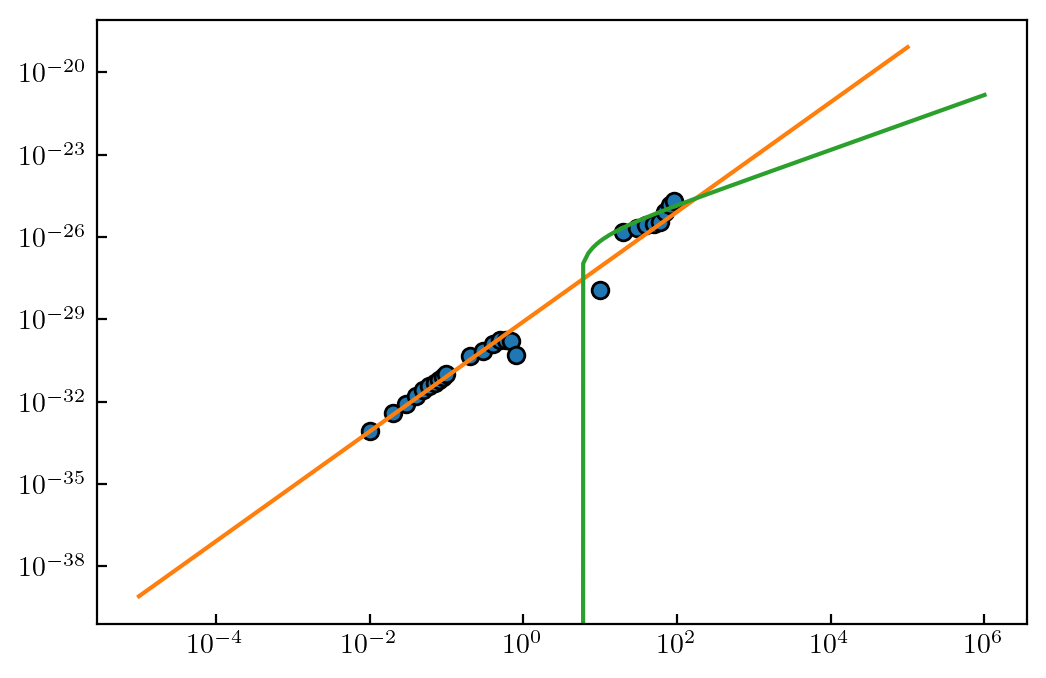

In [73]:
plt.plot(np.mean(tau4_simu, axis = 0), np.mean(C4_simu, axis = 0), "o")

tt_court = np.linspace(1e-5, dt*Nt, 10000)
tt_long = np.linspace(1e-2, dt*Nt*10, 1000000)

plt.loglog(tt_court, C4_court_theo*tt_court**2,label=r"Court")
plt.plot(tt_long, 24*C4_long_theo[0]*tt_long-24*C4_long_theo[1], label=r"Long")

# plt.xlim([0,30])
# plt.ylim([0, 0.2e-24])

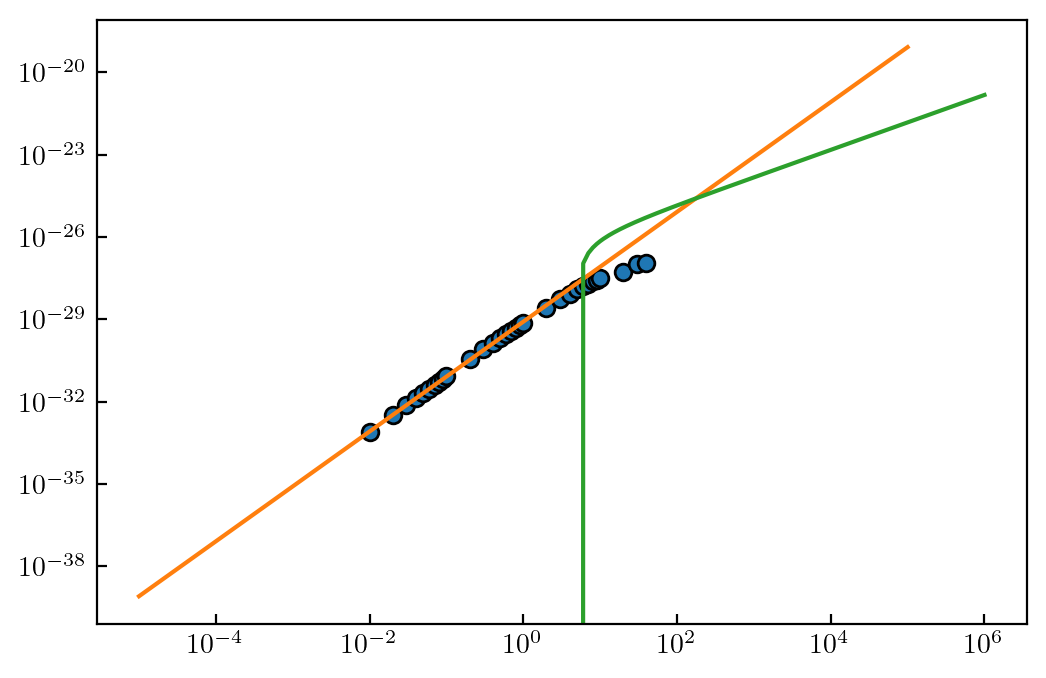

In [74]:
data = np.loadtxt("blabla.csv", delimiter = ",")
plt.loglog(tau4, np.mean( data, axis=0), "o")
plt.loglog(tt_court, C4_court_theo*tt_court**2,label=r"Court")
plt.plot(tt_long, 24*C4_long_theo[0]*tt_long-24*C4_long_theo[1], label=r"Long")

(0.01, 1000.0)

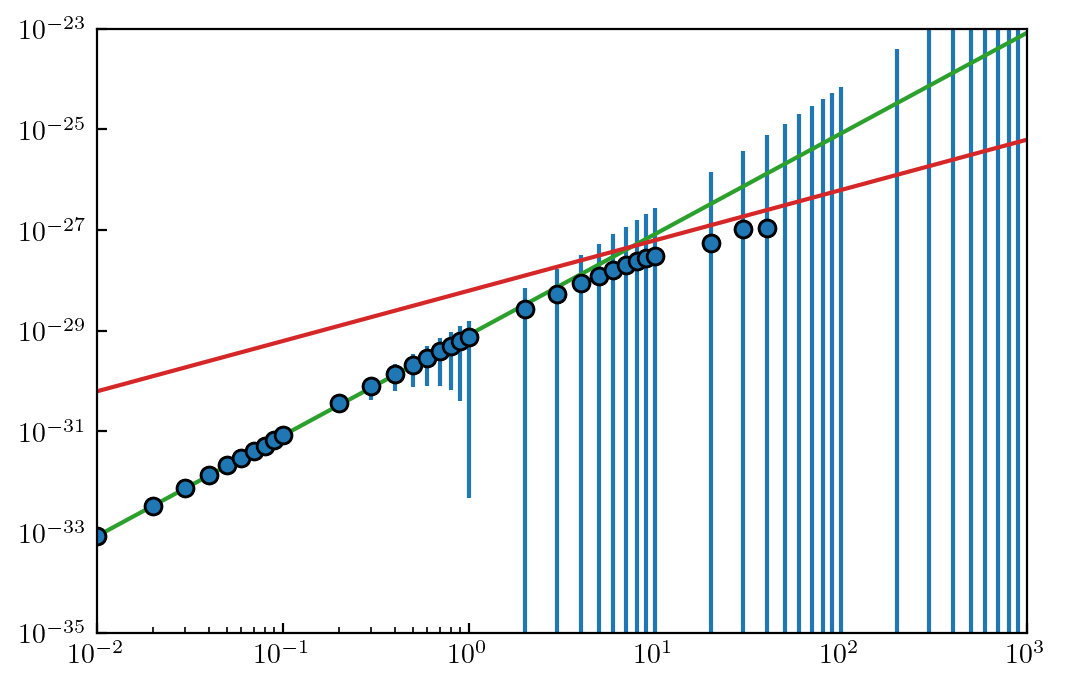

In [102]:
data = np.loadtxt("blabla.csv", delimiter = ",")
std = np.std( F)
plt.errorbar(tau4, np.mean( data, axis=0), yerr=std, xerr=std, fmt="o")
plt.loglog(tau4, np.mean( data, axis=0), "o")
plt.plot(tt_court, C4_court_theo*tt_court**2,label=r"Court")
plt.plot(tt_long, (C4_long_theo[0]*tt_long-C4_long_theo[1]*0), label=r"Long")
plt.ylim([1e-35, 1e-23])
plt.xlim([1e-2, 1e3])

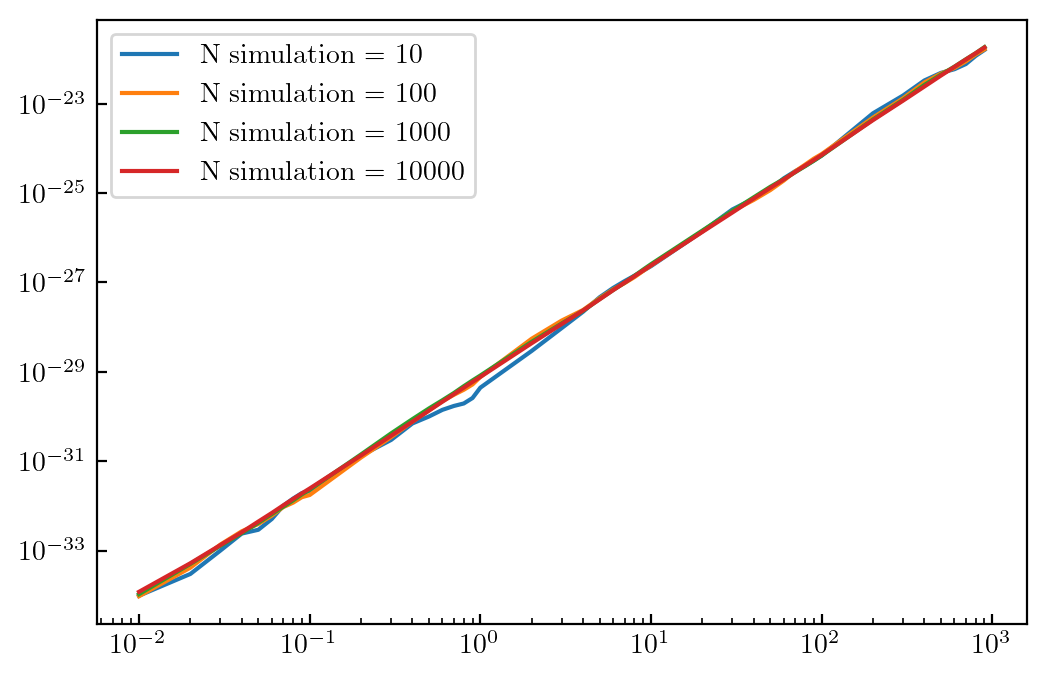

In [108]:
for i in [10,100,1000,10000]:
    plt.loglog(tau4,np.std( data[:i,:], axis=0), label = "N simulation = " + str(i))
plt.legend()

In [117]:
simu = RigidWallOverdampedLangevin3D(dt=1e-5, Nt=Nt, a=a, H=H, lD=lD,Nt_sub=1)
simu.trajectory()
tau, c4 = simu.Cumulant4("x", plot=False, output=True)

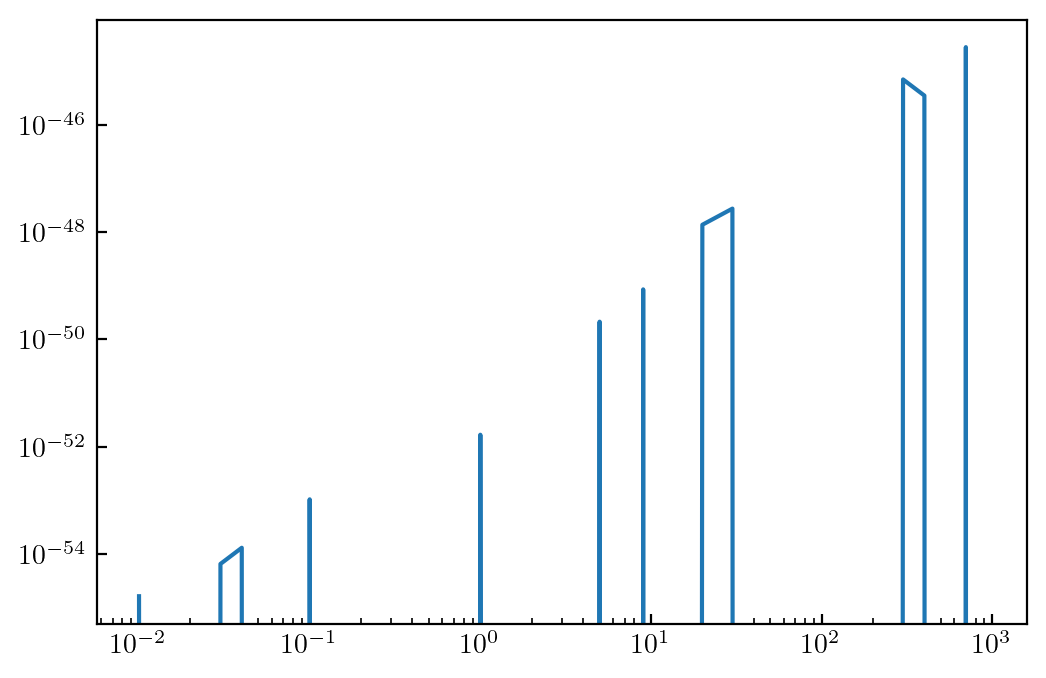

In [113]:
data2 = np.loadtxt("tenminus5.csv", delimiter = ",")


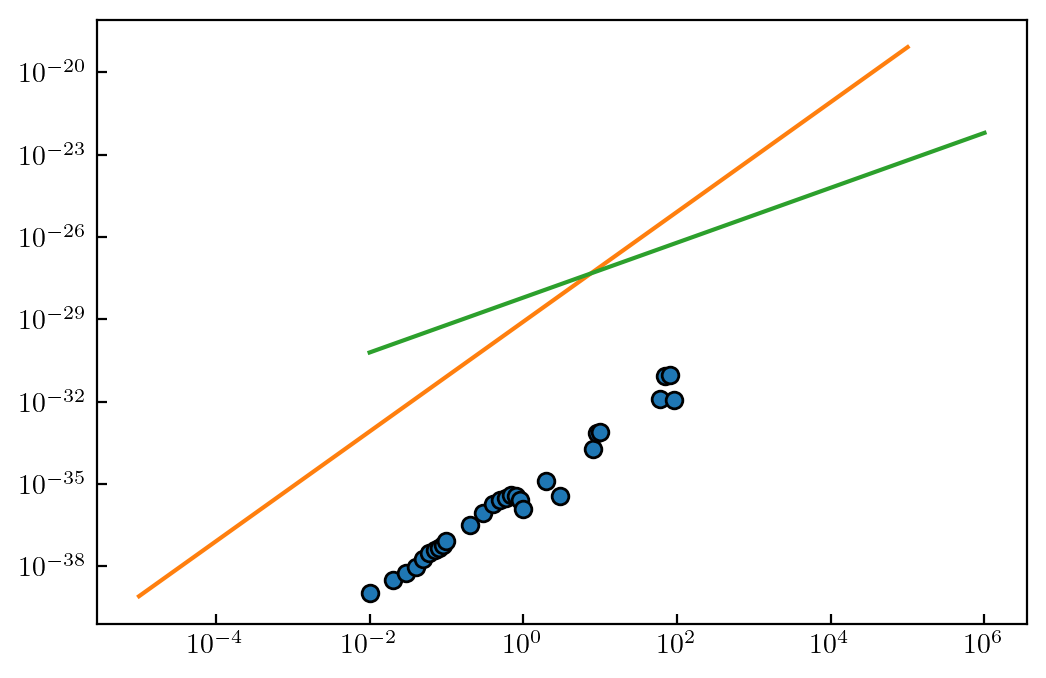

In [130]:
#std = np.std(data2, axis=0)
plt.errorbar(tau4, np.mean( data2, axis=0), yerr=std, xerr=std, fmt="o")

plt.loglog(tt_court, C4_court_theo*tt_court**2,label=r"Court")
plt.plot(tt_long, (C4_long_theo[0]*tt_long-
                   C4_long_theo[1]*0), label=r"Long")

In [124]:
np.mean(data2, axis=0)

array([ 1.08262575e-39,  3.12905250e-39,  5.69484858e-39,  9.48620372e-39,
        1.79616291e-38,  3.04074041e-38,  3.82128391e-38,  4.70634298e-38,
        6.17151063e-38,  8.21266270e-38,  3.32928793e-37,  8.89225390e-37,
        1.84307299e-36,  2.63969856e-36,  3.20185250e-36,  3.87577256e-36,
        3.65642113e-36,  2.53818774e-36,  1.20070816e-36,  1.28018253e-35,
        3.54047033e-36, -5.97700022e-35, -1.45588192e-34, -2.14457235e-34,
       -1.23328131e-34,  1.93297522e-34,  7.31613149e-34,  8.18716488e-34,
       -1.15906145e-32, -2.43532917e-32, -1.22492737e-32, -1.05142789e-32,
        1.24881963e-32,  9.01910743e-32,  9.39638403e-32,  1.15562417e-32,
       -6.19753148e-32, -2.48320875e-30, -5.34067458e-30, -2.53642206e-30,
       -5.68402053e-30, -1.59809569e-29, -2.00513418e-29, -3.56384651e-29,
       -3.99231785e-29])

(0.01, 1000.0)

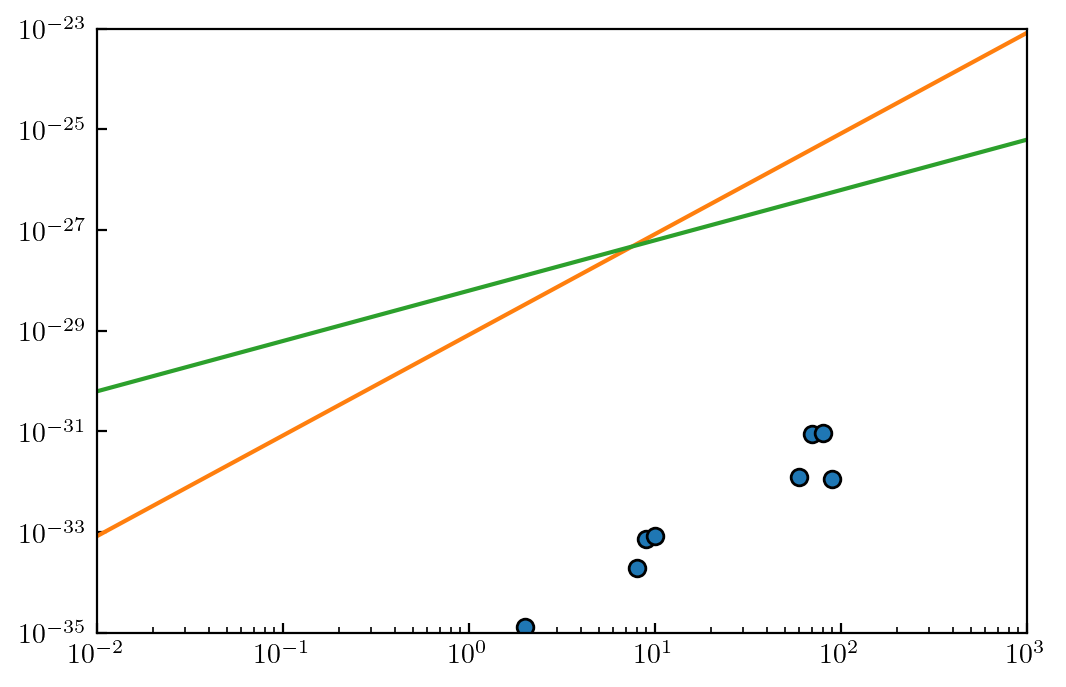

In [127]:
data = np.loadtxt("tenminus5.csv", delimiter = ",")
std = np.std(data2, axis = 0)
plt.errorbar(tau4, np.mean( data2, axis=0), yerr=std, xerr=std, fmt="o")
plt.loglog(tt_court, C4_court_theo*tt_court**2,label=r"Court")
plt.plot(tt_long, (C4_long_theo[0]*tt_long-C4_long_theo[1]*0), label=r"Long")
plt.ylim([1e-35, 1e-23])
plt.xlim([1e-2, 1e3])

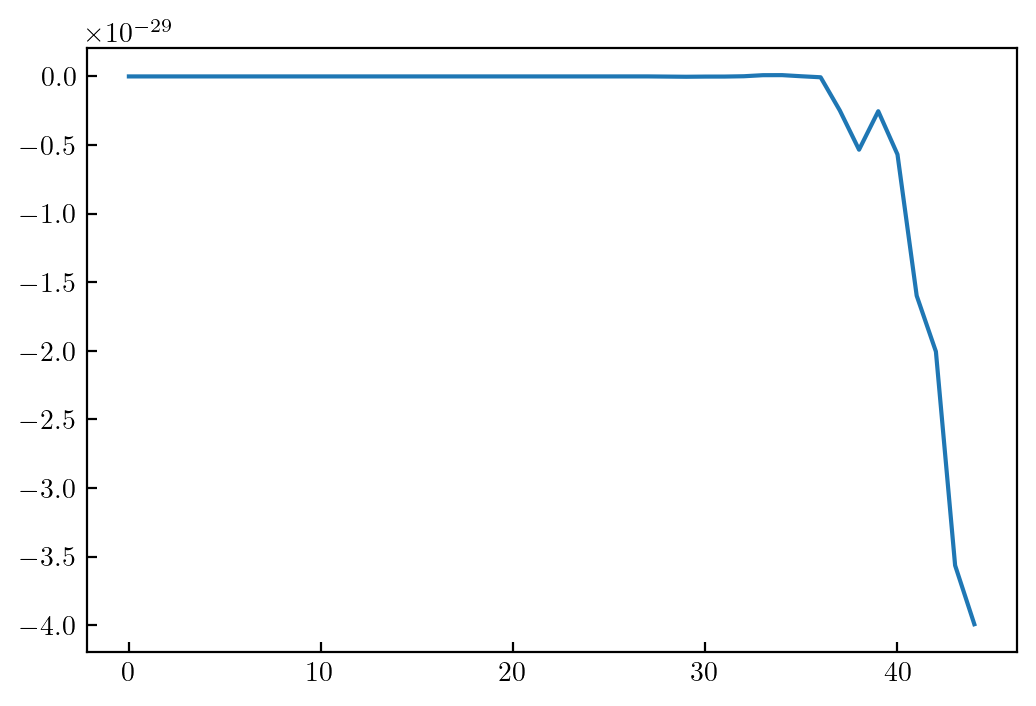

In [112]:
plt.plot(data2[1,:])

In [ ]:
(2.7e-30*24 - delta)/2/1.14e-30

In [ ]:
(2.7e-30*24 + delta)/2/1.14e-30

In [92]:
np.shape(data)

(24303, 45)

$24303$ simulations

d$t = 10^{-2}$ s

$Nt = 10^7$

subsampling $= 1000$ 
